In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure

In [2]:
# load data
column_headings1=('start','end','name','index')
df_pir=pd.read_csv('E:\\Bristol\\Applied Data Science\\data\\train\\00001\\pir.csv',names=column_headings1)

df=pd.read_csv('E:\\Bristol\\Applied Data Science\\data\\train\\00001\\location_0.csv')

In [3]:
# convert two columns of time to serial one
dfa= pd.concat([df['start'],df['end']])
dfb= dfa.to_frame()     # change to dataframe
dfb.columns= ['t']
dfb['index']= df['index'][dfb.index.values]
dfb['name']= df['name'][dfb.index.values]
dfb= dfb.sort().reset_index()
#dfb
del dfb['level_0']
dfb['t']= pd.to_timedelta(dfb['t'], unit='s')
dfb = dfb.set_index(pd.TimedeltaIndex(dfb['t']))
del dfb['t']
dfb= dfb.sort()
dfb.head()

,index,name
00:00:45.930000,3,hall
00:00:47.130000,3,hall
00:00:47.330000,5,living
00:07:05.930000,5,living
00:07:06.230000,3,hall


In [4]:
df_pira= pd.concat([df_pir['start'],df_pir['end']])
df_pirb= df_pira.to_frame()
df_pirb.columns= ['t']
df_pirb['pir_index']= df_pir['index'][df_pirb.index.values]
df_pirb['name']= df_pir['name'][df_pirb.index.values]
df_pirb= df_pirb.sort().reset_index()
#df_pirb
del df_pirb['index']
df_pirb['t']= pd.to_timedelta(df_pirb['t'],unit='s')
df_pirb= df_pirb.set_index(pd.TimedeltaIndex(df_pirb['t']))
#df_pirb
del df_pirb['t']
df_pirb= df_pirb.sort()
df_pirb.head()

,pir_index,name
00:00:04.608000,7,study
00:00:06.556000,7,study
00:00:15.873000,7,study
00:00:20.657000,6,stairs
00:00:22.924000,6,stairs


In [5]:
column_headings1=('start','end','name','index')
df1=pd.read_csv('E:\\Bristol\\Applied Data Science\\data\\train\\00001\\pir.csv',names=column_headings1)

In [6]:
# merge the time periods of same neighboring names
df1_part1=df1[6:50]
df1_part2=df1[50:87]
df1_part3=df1[87:90]
df1_part4=df1[90:92]
df1_part5=df1[92:95]
df1_part6=df1[95:108]
df1_part7=df1[108:111]
df1_part8=df1[111:113]

def all_combine (DF):
    f1=lambda x: x.min()
    grouped1= DF.groupby('index')['start'].apply(f1)
    f2=lambda y: y.max()
    grouped2= DF.groupby('index')['end'].apply(f2)
    grouped_part= pd.concat([grouped1, grouped2],axis=1).reset_index()
    return grouped_part

In [7]:
# convert to a dataframe
grouped_part1= all_combine(df1_part1)
grouped_part2= all_combine(df1_part2)
grouped_part3= all_combine(df1_part3)
grouped_part4= all_combine(df1_part4)
grouped_part5= all_combine(df1_part5)
grouped_part6= all_combine(df1_part6)
grouped_part7= all_combine(df1_part7)
grouped_part8= all_combine(df1_part8)
grouped= grouped_part1.merge(grouped_part2,how='outer').merge(grouped_part3,how='outer').merge(grouped_part4,how='outer').merge(grouped_part5,how='outer').merge(grouped_part6,how='outer').merge(grouped_part7,how='outer').merge(grouped_part8,how='outer')

In [8]:
groupeda= pd.concat([grouped['start'],grouped['end']])
groupedb=groupeda.to_frame()
groupedb.columns=['t']
groupedb['index']=grouped['index'][groupedb.index.values]
groupedb= groupedb.sort().reset_index()
groupedb
del groupedb['level_0']
groupedb['t']= pd.to_timedelta(groupedb['t'],unit='s')
groupedb= groupedb.set_index(pd.TimedeltaIndex(groupedb['t']))
groupedb= groupedb.sort()
del groupedb['t']
groupedb.head()

,index
00:00:46.596000,6.0
00:00:50.810000,6.0
00:01:00.852000,5.0
00:07:06.286000,5.0
00:07:17.696000,4.0


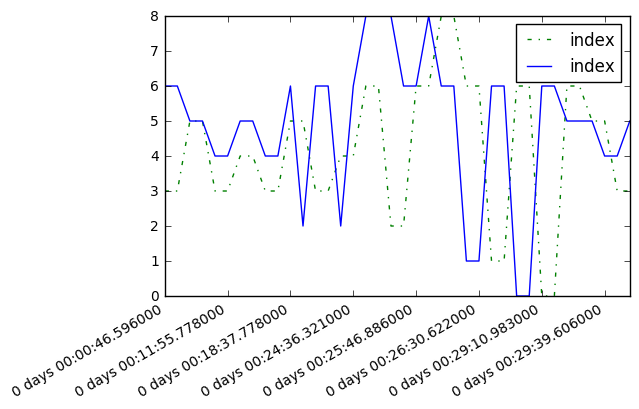

In [9]:
ax=dfb.plot(style='g-.',legend='location_index')
groupedb.plot(ax=ax,legend='pir_index')

<function matplotlib.pyplot.show>

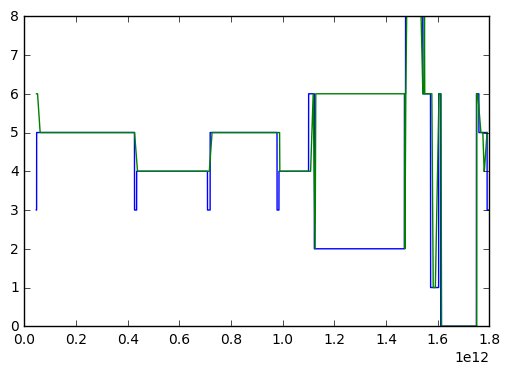

In [10]:
plt.plot(dfb.index,dfb['index'])
plt.plot(groupedb.index,groupedb['index'])
plt.show